# SEGMENTACIÓN SENCILLA A COLOR<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Librerias

In [1]:
import requests
import cv2
import numpy as np
from  cv2 import imread
import matplotlib.pyplot as plt

In [2]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# Lectura de imagen a color

In [ ]:
url_imagen = "https://raw.githubusercontent.com/joseramoniglesias/Tratamiento_Senales/main/clases/Cap01_Introducci%C3%B3n/Python/flowers.jpg"
nombre_local_imagen = "flowers.jpg" # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
  handler.write(imagen)

size =  (1600, 1600, 3)
max  =  255
min  =  0


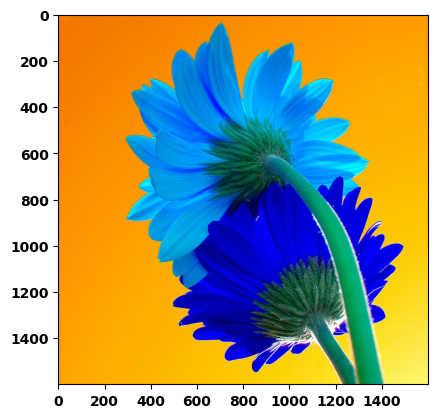

In [3]:
Icv = imread('flowers.jpg')               # Lectura en formato (BGR)
plt.imshow(Icv)
howis(Icv)

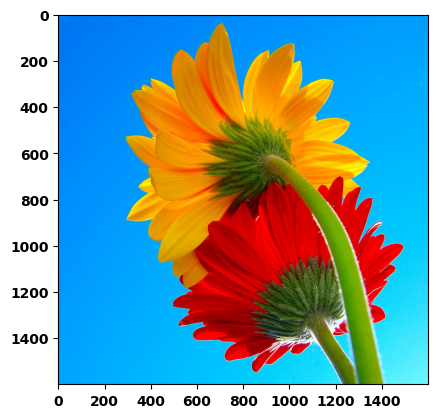

In [4]:
I = Icv[:,:,[2,1,0]]            # conversion a formato estándar (RGB)
plt.imshow(I)
plt.show()

# Canales de color

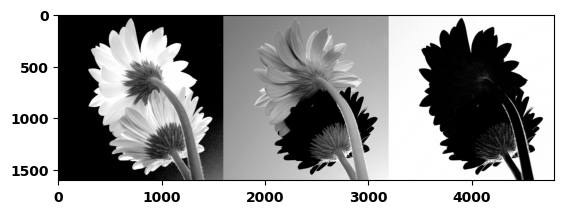

In [5]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
plt.imshow(RGB,cmap='gray')

# Conversion a blanco y negro (tonos de gris)

size =  (1600, 1600)
max  =  255
min  =  0


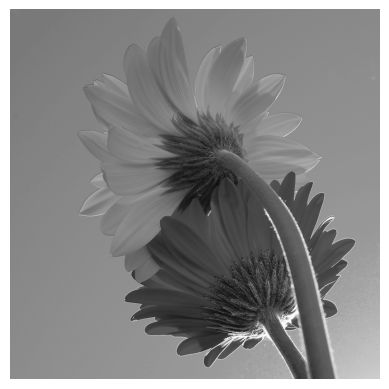

In [6]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
k  = (1/3,1/3,1/3)
Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
howis(Z)
plt.axis('off')
plt.imshow(Z,cmap='gray')

# Histograma

In [7]:
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()


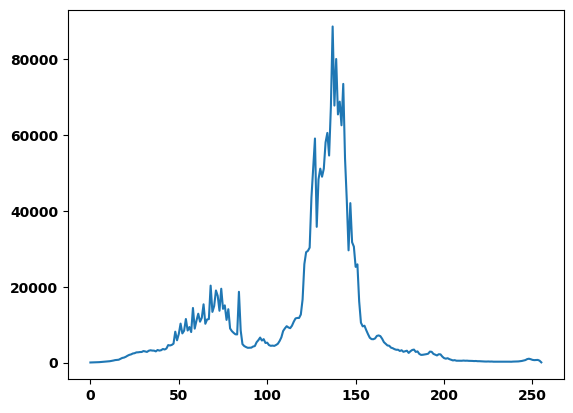

In [8]:
imhist(Z)

# Segmentación de la Flor Roja

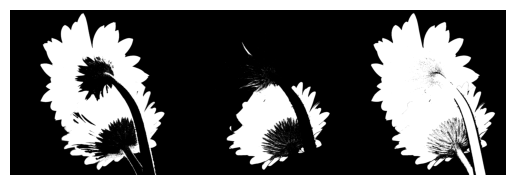

In [9]:
Sr = R>150
Sg = G<40
Sb = B<40 
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
plt.axis('off')
plt.imshow(Srgb*255,cmap='gray')

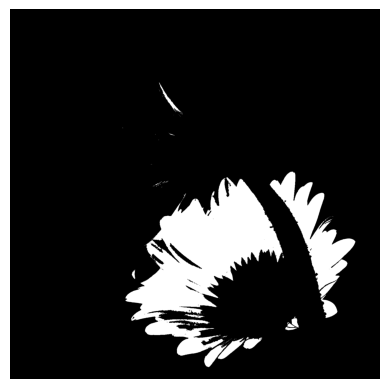

In [10]:
S = np.logical_and(Sr,Sg,Sb)
plt.axis('off')
plt.imshow(S*255,cmap='gray')

# Eliminación de filas con pocos unos

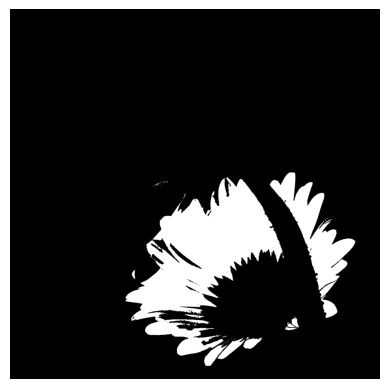

In [11]:
(N,M) = S.shape
Q = S
for i in range(N):
  s = np.sum(S[i,:])
  if s<20:
    Q[i,:] = 0
plt.axis('off')
plt.imshow(Q*255,cmap='gray')

# Búsqueda de (imin,jmin) y (imax,jmax) en la región segmetada

In [12]:
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if Q[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

# Gráfica de Bounding Box

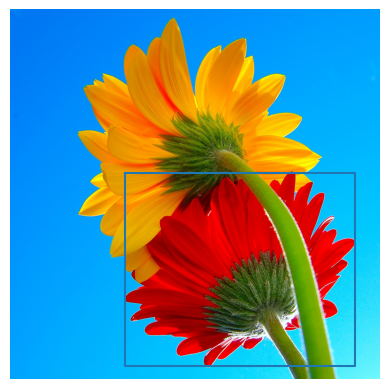

In [13]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.axis('off')
plt.imshow(I)
plt.plot(x,y)
plt.show()

# Detección de Bordes

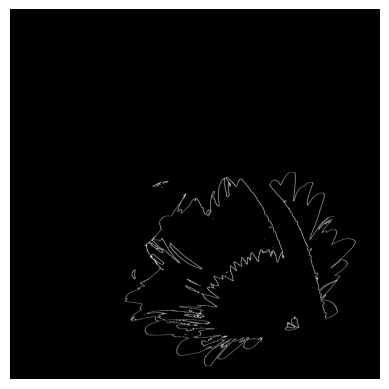

In [14]:
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]: 
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]: 
      E[i,j]   = 1
      E[i,j-1] = 1
plt.axis('off')
plt.imshow(E*255,cmap='gray')

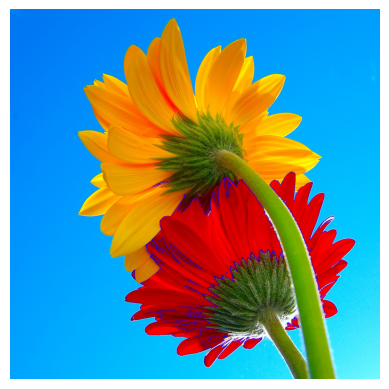

In [15]:
for i in range(N):
  for j in range(M):
    if E[i,j]==1:
      Icv[i,j,:] = [255,0,0]
plt.axis('off')
plt.imshow(cv2.cvtColor(Icv,cv2.COLOR_BGR2RGB))

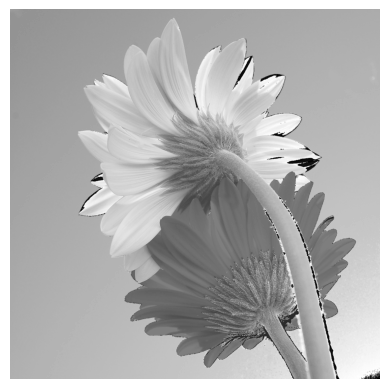

In [16]:
# Convertir a escala de grises
Img = cv2.imread('flowers.jpg',cv2.IMREAD_GRAYSCALE)
# Incrementa la intensidad de todos los píxeles en 50
img_mod = Img + 50
plt.axis('off')
plt.imshow(img_mod,cmap='gray')
plt.show()

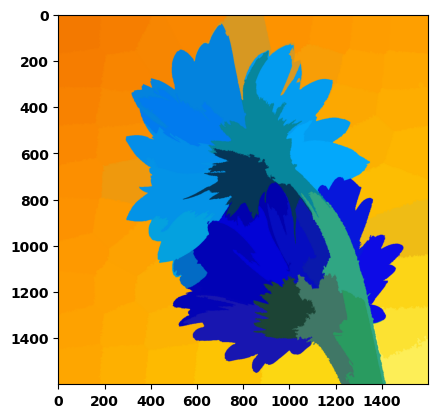

In [17]:
from skimage.segmentation import slic
from skimage.color import label2rgb
imagen_rgb = cv2.imread('flowers.jpg')
# Aplicar la segmentación SLIC
segmentos = slic(imagen_rgb)

# Mostrar la segmentación
imagen_segmentada = label2rgb(segmentos, imagen_rgb, kind='avg')
plt.imshow(imagen_segmentada)
plt.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).